#### importing libraries and reading datasheet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("project.csv")
df.head(20)

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ghaziabad,Burglars make off with Rs 2lakh goods,GHAZIABAD: Burglars broke into a house in Shan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ghaziabad,77-year-old man booked for molesting girl in l...,"GHAZIABAD: A 77-year-old man, who was in judic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,1.0
7,Ghaziabad,Stalker threatens B.Tech student over wedding ...,GHAZIABAD: A third-year BTech student of a col...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,NaN
8,Ghaziabad,Delivery boy robbed of goods worth Rs 2.5 lakh,GHAZIABAD: A man was booked on Thursday for al...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ghaziabad,"Man books flat for Rs 9 lakh, house sold to an...",GHAZIABAD: A 40-year-old man in Indirapuram ha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### dropping unnecessary columns and filling null values with zero

In [2]:
df = df.drop(columns = ["Title"])
df = df.drop(columns = ["Text"])
df = df.fillna(0)

#### renaming columns

In [3]:
col = df.columns

df.columns = [i for i in range(len(df.columns))]


### city wise crimes

In [4]:
df[0].value_counts()

Lucknow      202
Ghaziabad    167
Kanpur        97
Name: 0, dtype: int64

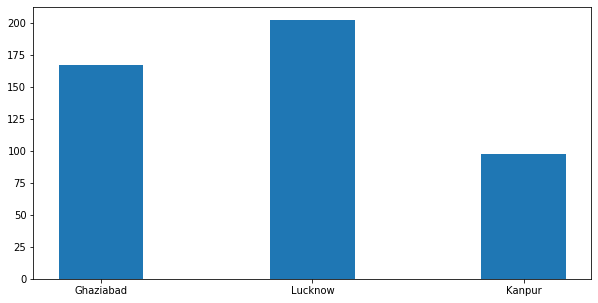

In [36]:
city = ['Ghaziabad','Lucknow','Kanpur']
count = [167,202,97]
plt.figure(figsize = (10,5))
plt.bar(city,count,width = 0.4)
plt.show()

- most crimes in Lucknow
- least crimes in kanpur

# Crime Against Women

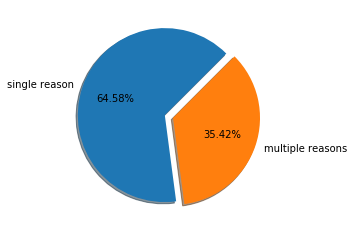

In [37]:
# crime cases happened due to single reason
list1 = [i for i in df[8] if len(str(i)) == 1 and int(i) != 0]
x1 = len(list1)   # x1 = 124


# crime cases happened due to multiple reasons
list2 = [x for x in df[8] if len(str(x).split(',')) >= 2]
x2 = len(list2)  # x2 = 68

ex = [0,0.1]
l1 = [x1,x2]
l2 = ['single reason', 'multiple reasons']
plt.pie(l1,labels = l2, startangle = 45,explode = ex, shadow =  True, autopct = '%1.2f%%')
plt.show()

- more than 35 percent crimes against women have happened due to multiple reasons

In [38]:
for i in list2:
    print(i)

8,10
4,7
1,10
1,10
7,10
7,10
2,3,6
1,4,10
5,6
1, 10
7,10
2,3,6
7,10
2,3,6
7,10
7,10
7,10
2,3,6
8, 10
8, 10
2,3
7,9
3,7,10
7,10
1,10
7,9
8,10
7, 10
7, 10
2,6
7,10
7,10
2,6
7, 10
8, 10
8, 10
8, 10
7, 10
4,8
3,7
7, 10
7,10
7,10
7,10
7,10
3,8
2,6
7,8
1,4
7,10
4,7
3,8
7,10
3,8
8, 10
6, 8
7,10
7,10
4,7,10
8,9
7,8
1, 10
7, 10
7, 10
7, 10
8, 10
1, 10
3,8


- it can be observed from above that crime 10 (**Protection of Children from Sexual Offences Act**) has frequently occured with crime 7 (**Rape only**).
- also crime 3 (**Suicide**) has frequently occured with either crime 2 (**Dowry deaths**) or crime 6 (**Cruelty by husband/ in-laws**) or both.

In [39]:
d = {0:0,'Property Disputes':1, 'Family Dispute':2, 'Petty Quarrels':3, 'Money Disputes':4, 'Personal Vendetta':5,
     'Love Affairs':6, 'Casteism':7, 'Unknown reasons':8}
df[1] = df[1].apply(lambda x: d[x])


In [40]:
df[11] = 0
df[12] = 0

for i in range (0,len(df)):
    if ',' in str(df.iloc[i,8]):
        lst = df.iloc[i,8].split(',')
        df.iloc[i,8] = int(lst[0])
        df.iloc[i,11] = int(lst[1])
        if len(lst) > 2:
            df.iloc[i,12] = int(lst[2])
    elif int(df.iloc[i,8]) > 100:
        df.iloc[i,11] = int(df.iloc[i,8]) % 100
        df.iloc[i,8] = (df.iloc[i,8])//100

### Crime against women with different reasons

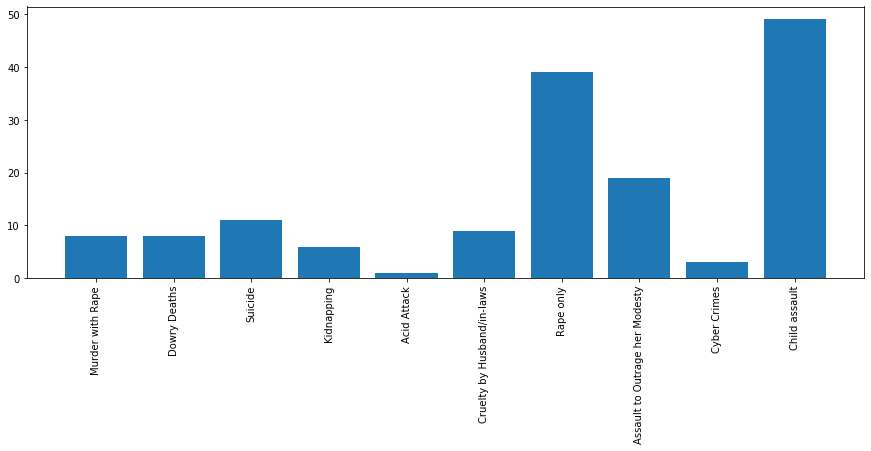

In [41]:
crimes = [0,0,0,0,0,0,0,0,0,0]
reasons = ['Murder with Rape','Dowry Deaths','Suicide','Kidnapping','Acid Attack','Cruelty by Husband/in-laws',
           'Rape only','Assault to Outrage her Modesty','Cyber Crimes','Child assault']
for i in range (1,11):
    crimes[i-1] = df.loc[(df[8]==i) | (df[11]==i) | (df[12]==i),9].sum()+df.loc[(df[8]==i) | (df[11]==i) | (df[12]==i),10].sum()
plt.figure(figsize = (15,5))
plt.bar(reasons,crimes)
plt.xticks(rotation = 90)
plt.show()

# Kidnapping analysis

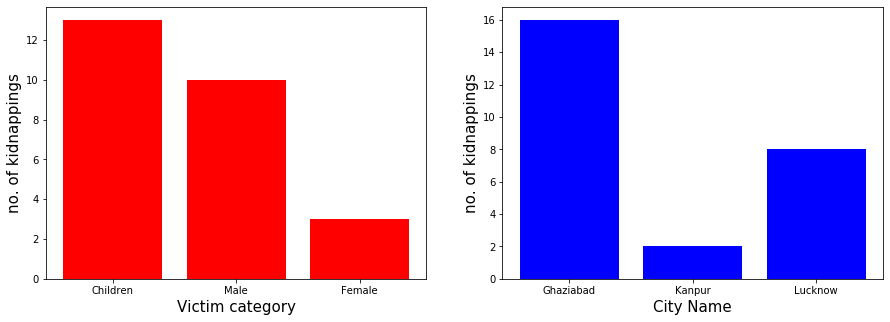

In [42]:
victim = ['Children','Male','Female']
no_of_cases = [df[5].sum(),df[6].sum(),df[7].sum()]

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.bar(victim,no_of_cases,color = 'red')
plt.xlabel('Victim category',fontsize = 15)
plt.ylabel('no. of kidnappings',fontsize = 15)

# City wise kidnappings
x1 = 0
x2 = 0
x3 = 0
for i in range(0, len(df)):
    if df.iloc[i,0] == 'Ghaziabad':
        x1 = x1 + df.iloc[i,5] + df.iloc[i,6] + df.iloc[i,7]
    elif df.iloc[i,0] == 'Kanpur':
        x2 = x2 + df.iloc[i,5] + df.iloc[i,6] + df.iloc[i,7]
    elif df.iloc[i,0] == 'Lucknow':
        x3 = x3 + df.iloc[i,5] + df.iloc[i,6] + df.iloc[i,7]
count = [x1,x2,x3]
city = ['Ghaziabad', 'Kanpur', 'Lucknow']

plt.subplot(1,2,2)
plt.bar(city,count,color = 'blue')
plt.xlabel('City Name',fontsize = 15)
plt.ylabel('no. of kidnappings',fontsize = 15)
plt.show()

- Children are more likely to be abducted.
- Kanpur sees least cases of kidnapping while Ghaziabad tops among the three.

# Murder Analysis

In [43]:
df[1].value_counts()

0    319
8     40
6     30
3     19
5     16
2     16
4     14
1     10
7      2
Name: 1, dtype: int64

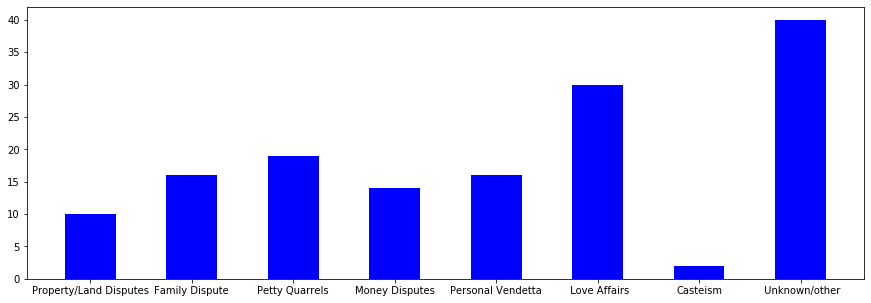

In [44]:
reasons = ['Property/Land Disputes','Family Dispute','Petty Quarrels','Money Disputes','Personal Vendetta',' Love Affairs', 
           'Casteism',' Unknown/other']
c = [10,16,19,14,16,30,2,40]

plt.figure(figsize = (15,5))
plt.bar(reasons,c,color = 'blue',width = 0.5)
plt.show()

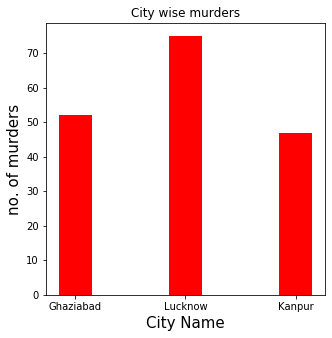

In [45]:
city = ['Ghaziabad','Lucknow','Kanpur']
murders = [0,0,0]

for i in range(len(df)):
    if df.iloc[i,0] == 'Ghaziabad':
        murders[0] = murders[0] + df.iloc[i,2] + df.iloc[i,3] + df.iloc[i,4]
    elif df.iloc[i,0] == 'Lucknow':
        murders[1] = murders[1] + df.iloc[i,2] + df.iloc[i,3] + df.iloc[i,4]
    elif df.iloc[i,0] == 'Kanpur':
        murders[2] = murders[2] + df.iloc[i,2] + df.iloc[i,3] + df.iloc[i,4]
plt.figure(figsize = (5,5))
plt.bar(city,murders,color = 'red',width = 0.3)
plt.xlabel('City Name',fontsize = 15)
plt.ylabel('no. of murders', fontsize = 15)
plt.title('City wise murders')
plt.show()